In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def columns_isolate(df, keyword):
    columns = df.columns 
    col_keys = [col for col in columns if keyword in col]
    col_values = df[col_keys]
    return col_keys, col_values

In [55]:
auto = pd.read_csv(r"06_28_21_Dls_Viscosity_Corrected")
auto = auto[auto['Aliquot']==1]
auto = auto[auto['Run']==1]
auto['ODE concentration wtf']

0      0.000
9      0.000
18     0.000
27     0.000
36     0.000
       ...  
810    0.001
819    0.001
828    0.001
837    0.001
846    0.001
Name: ODE concentration wtf, Length: 95, dtype: float64

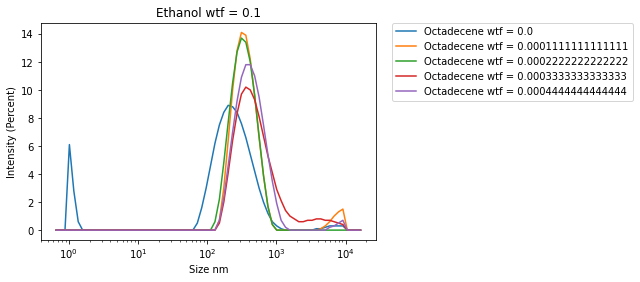

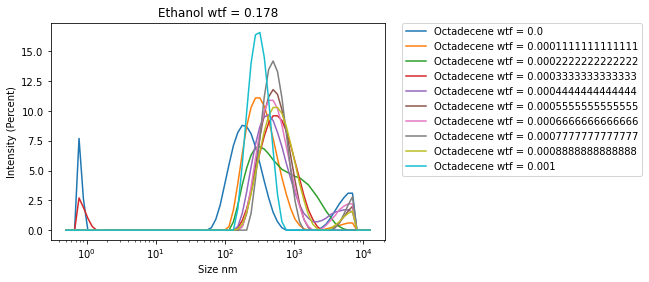

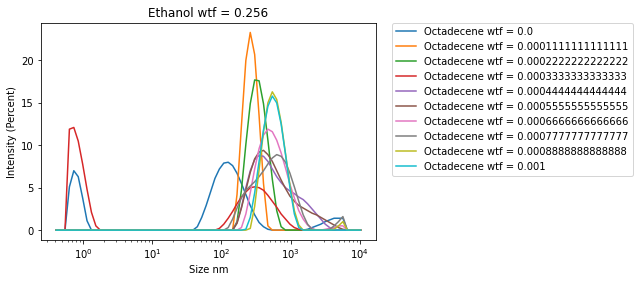

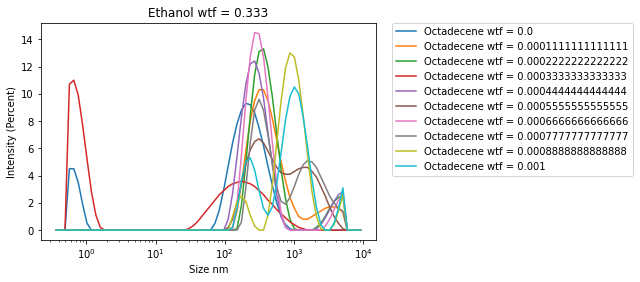

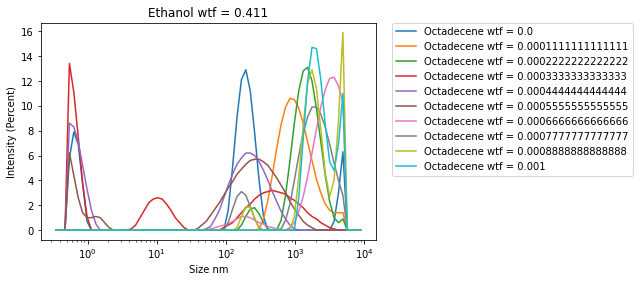

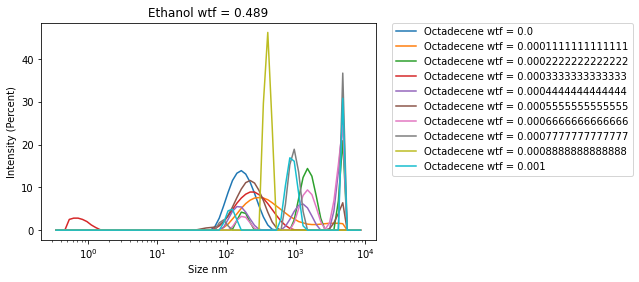

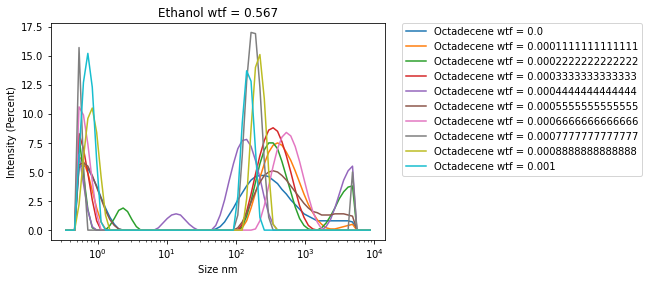

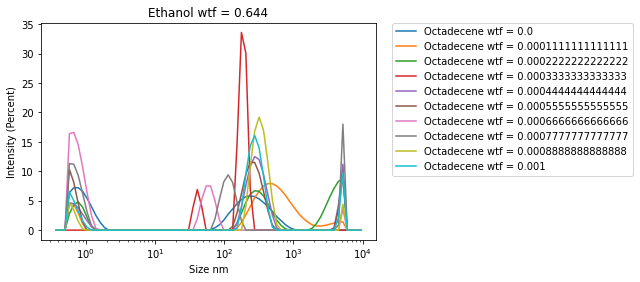

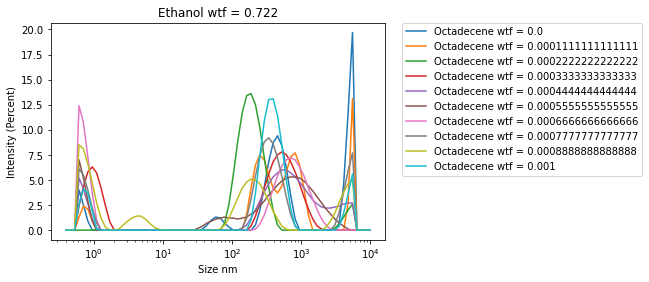

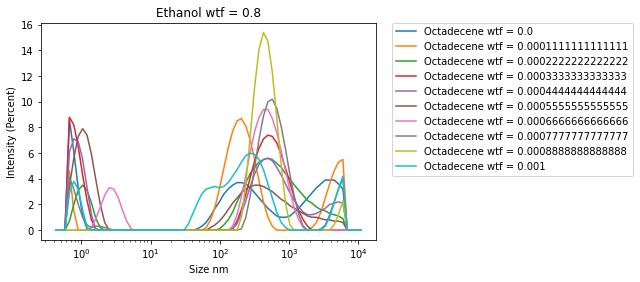

In [56]:

auto_etoh_groups = auto.groupby('ethanol concentration wtf')

for etoh, etoh_group in auto_etoh_groups:
#     size_cols, sizes = columns_isolate(etoh_group,'Sizes')
#     intensity_cols, intensities = columns_isolate(etoh_group,'Intensities')
#     fig, ax = plt.subplots() # looking at one single etoh
    run_groups = etoh_group.groupby('Run') # for auto lets look at one aliquot
    fig, axes = plt.subplots()
    for run, run_group in run_groups:
        size_cols, sizes = columns_isolate(run_group,'Sizes')
        intensity_cols, intensities = columns_isolate(run_group,'Intensities')
#         ax = axes[int(run)-1]
        for index, size in sizes.iterrows():
            row = run_group.loc[index]
            label = 'Octadecene wtf = ' + str(row['ODE concentration wtf'])# 'Aliquot = ' + str(row['Aliquot'])
            intensity = intensities.loc[index]
            axes.plot(size, intensity, label=label)
            axes.set_title('Ethanol wtf = ' + str(round(etoh,3)))
            axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            axes.set_xscale('log')
            axes.set_xlabel('Size nm')
            axes.set_ylabel('Intensity (Percent)')

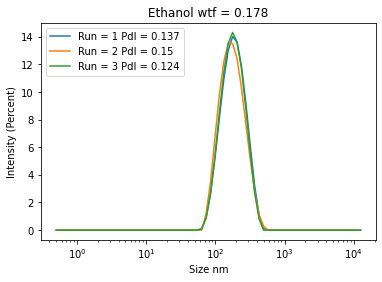

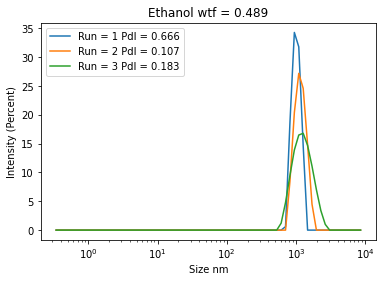

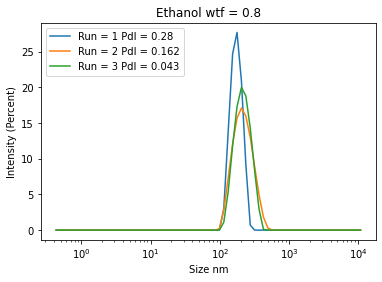

In [4]:
manual = pd.read_csv("Manual_Info_Added_Viscosity_Corrected")
manual_etoh_groups = manual.groupby('ethanol concentration wtf')

for etoh, etoh_group in manual_etoh_groups:
    size_cols, sizes = columns_isolate(etoh_group,'Sizes')
    intensity_cols, intensities = columns_isolate(etoh_group,'Intensities')
    fig, ax = plt.subplots() # looking at one single etoh
    
    for index, size in sizes.iterrows():
        row = etoh_group.loc[index]
        intensity = intensities.loc[index]
        label = 'Run = ' + str(row['Run']) + ' PdI = ' + str(row['PdI'])
        intensity = intensities.loc[index]
        ax.plot(size, intensity, label=label)
        ax.set_title('Ethanol wtf = ' + str(round(etoh,3)))
        ax.legend()
        ax.set_xscale('log')
        ax.set_xlabel('Size nm')
        ax.set_ylabel('Intensity (Percent)')

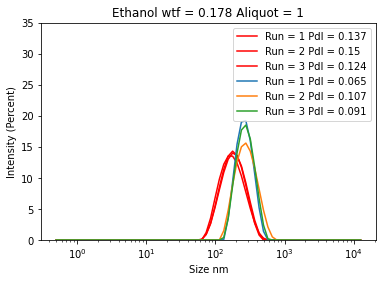

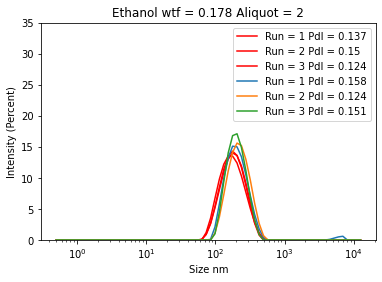

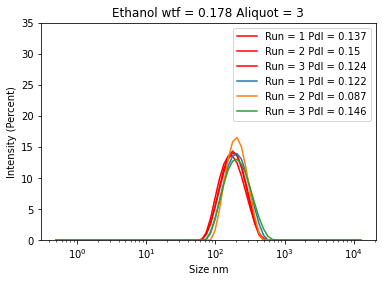

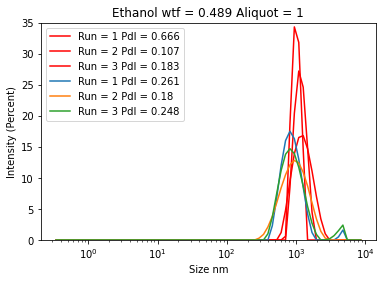

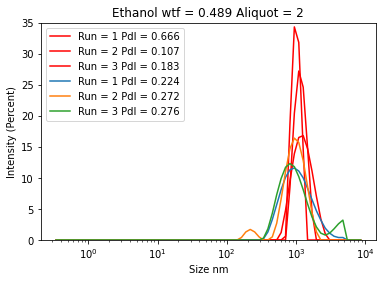

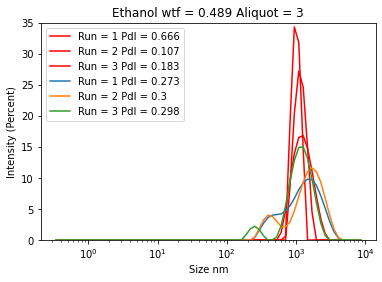

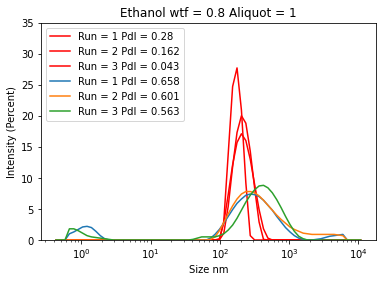

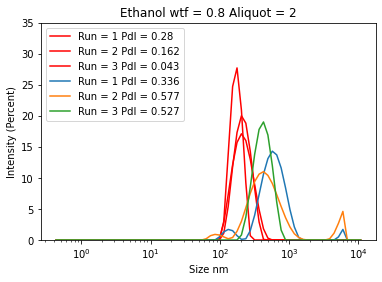

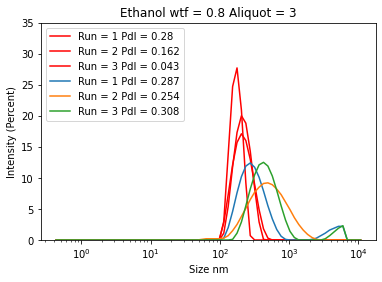

In [33]:
# lets plot the manual with the auto ones

for etoh, etoh_group in auto_etoh_groups:
    manual_groups = manual[manual['ethanol concentration wtf']==etoh]
    manual_size_cols, manual_sizes = columns_isolate(manual_groups,'Sizes')
    manual_intensity_cols, manual_intensities = columns_isolate(manual_groups,'Intensities')
    manual_sizes.reset_index(drop=True, inplace=True)
    manual_intensities.reset_index(drop=True, inplace=True)
    manual_groups.reset_index(drop=True, inplace=True)
    aliquot_groups = etoh_group.groupby('Alliquot') # for auto lets look at one aliquot
    for aliquot, aliquot_group in aliquot_groups:
        fig, ax = plt.subplots()
        size_cols, sizes = columns_isolate(aliquot_group,'Sizes')
        intensity_cols, intensities = columns_isolate(aliquot_group,'Intensities')
        i = 0
        for index, size in sizes.iterrows():
            manual_group = manual_groups.loc[i]
            manual_size = manual_sizes.loc[i]
            manual_intensity = manual_intensities.loc[i]
            i = i + 1 
            label = 'Run = ' + str(manual_group['Run']) + ' PdI = ' + str(manual_group['PdI'])
            ax.plot(manual_size, manual_intensity, c='r', label=label)
        
        for index, size in sizes.iterrows():
            row = aliquot_group.loc[index]
            label = 'Run = ' + str(row['Run']) + ' PdI = ' + str(row['PdI'])
            intensity = intensities.loc[index]
            ax.plot(size, intensity, label=label)
            ax.set_title('Ethanol wtf = ' + str(round(etoh,3)) +' Aliquot = ' + str(aliquot))
            ax.legend()
            ax.set_xscale('log')
            ax.set_xlabel('Size nm')
            ax.set_ylabel('Intensity (Percent)')
            ax.set_ylim(0,35)
            